In [1]:
import tensorflow as tf

In [2]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [3]:
import pathlib

data_root_orig = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz', fname='flower_photos', untar=True)
data_root = pathlib.Path(data_root_orig)
print(data_root)

228818944/228813984 [==============================] - 27s 0us/step
C:\Users\PC\.keras\datasets\flower_photos


In [4]:
for item in data_root.iterdir():
    print(item)

C:\Users\PC\.keras\datasets\flower_photos\daisy
C:\Users\PC\.keras\datasets\flower_photos\dandelion
C:\Users\PC\.keras\datasets\flower_photos\LICENSE.txt
C:\Users\PC\.keras\datasets\flower_photos\roses
C:\Users\PC\.keras\datasets\flower_photos\sunflowers
C:\Users\PC\.keras\datasets\flower_photos\tulips


In [6]:
import random

all_image_paths = list(data_root.glob("*/*"))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
image_count

3670

In [7]:
all_image_paths[:10]

['C:\\Users\\PC\\.keras\\datasets\\flower_photos\\tulips\\17844723633_da85357fe3.jpg',
 'C:\\Users\\PC\\.keras\\datasets\\flower_photos\\roses\\5835539224_75967fc400_m.jpg',
 'C:\\Users\\PC\\.keras\\datasets\\flower_photos\\sunflowers\\13117907313_86c99c6441.jpg',
 'C:\\Users\\PC\\.keras\\datasets\\flower_photos\\roses\\15312360171_57bde98799_n.jpg',
 'C:\\Users\\PC\\.keras\\datasets\\flower_photos\\sunflowers\\14889779907_3d401bbac7_m.jpg',
 'C:\\Users\\PC\\.keras\\datasets\\flower_photos\\sunflowers\\10386540106_1431e73086_m.jpg',
 'C:\\Users\\PC\\.keras\\datasets\\flower_photos\\tulips\\8687675254_c93f50d8b0_m.jpg',
 'C:\\Users\\PC\\.keras\\datasets\\flower_photos\\tulips\\490541142_c37e2b4191_n.jpg',
 'C:\\Users\\PC\\.keras\\datasets\\flower_photos\\sunflowers\\9485002920_59af6f4cac.jpg',
 'C:\\Users\\PC\\.keras\\datasets\\flower_photos\\sunflowers\\18766965343_9f42d4bedc_m.jpg']

In [8]:
import os

attributions = (data_root/"LICENSE.txt").open(encoding="utf-8").readlines()[4:]
attributions = [line.split(" CC-BY") for line in attributions]
attributions = dict(attributions)

In [9]:
import IPython.display as display

def caption_image(image_path):
    image_rel = pathlib.Path(image_path).relative_to(data_root)
    return "Image (CC BY 2.0) " + ' - '.join(attributions[str(image_rel)].split(' - ')[:-1])

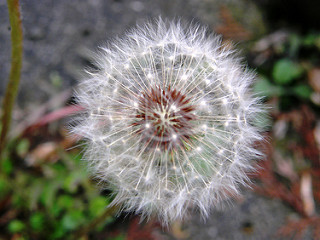

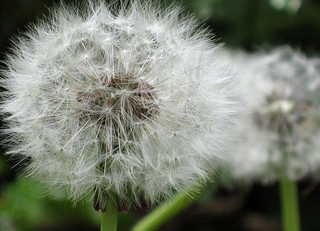

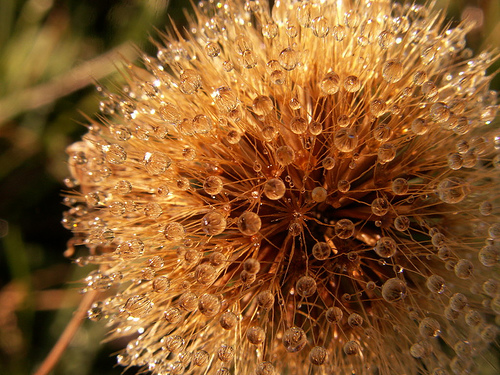

In [12]:
for n in range(3):
    image_path = random.choice(all_image_paths)
    display.display(display.Image(image_path))
    #print(caption_image(image_path))
    print()

In [14]:
# 确定每张图片的标签
# 列出可用的标签

label_names = sorted(item.name for item in data_root.glob("*/") if item.is_dir())
label_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [15]:
# 为每个标签分配索引

label_to_index = dict((name, index) for index, name in enumerate(label_names))
label_to_index

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [16]:
# 创建列表，包含每个文件的标签索引

all_image_labels = [label_to_index[pathlib.Path(path).parent.name] for path in all_image_paths]

print("First 10 labels indices: ", all_image_labels[:10])

First 10 labels indices:  [4, 2, 3, 2, 3, 3, 4, 4, 3, 3]


In [17]:
# 加载和格式化图片

img_path = all_image_paths[0]
img_path

'C:\\Users\\PC\\.keras\\datasets\\flower_photos\\tulips\\17844723633_da85357fe3.jpg'

In [18]:
img_raw = tf.io.read_file(image_path)
print(repr(img_raw)[:100] + "...")

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x...


In [19]:
# 解码为图像张量（tensor）

img_tensor = tf.image.decode_image(img_raw)

print(img_tensor.shape)
print(img_tensor.dtype)

(375, 500, 3)
<dtype: 'uint8'>


In [20]:
img_final = tf.image.resize(img_tensor, [192, 192])
img_final = img_final / 255.0
print(img_final.shape)
print(img_final.numpy().min())
print(img_final.numpy().max())

(192, 192, 3)
0.0
1.0


In [21]:
# 包装为函数

def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [192, 192])
    image /= 255.0

    return image

In [22]:
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    return preprocess_image(image)

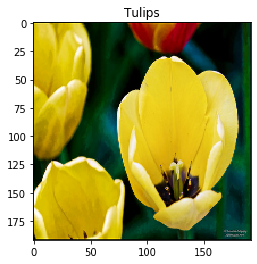

In [24]:
import matplotlib.pyplot as plt

image_path = all_image_paths[0]
label = all_image_labels[0]

plt.imshow(load_and_preprocess_image(image_path))
plt.grid(False)
#plt.xlabel(caption_image(img_path))
plt.title(label_names[label].title())
print()

In [25]:
# 构建数据集

path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)

In [26]:
print(path_ds)

<TensorSliceDataset shapes: (), types: tf.string>


In [27]:
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

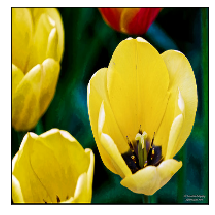

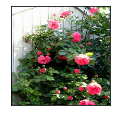

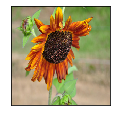

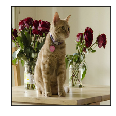

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
for n, image in enumerate(image_ds.take(4)):
    plt.subplot(2, 2, n+1)
    plt.imshow(image)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [29]:
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_image_labels, tf.int64))

In [30]:
for label in label_ds.take(10):
    print(label_names[label.numpy()])

tulips
roses
sunflowers
roses
sunflowers
sunflowers
tulips
tulips
sunflowers
sunflowers


In [31]:
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))

In [32]:
print(image_label_ds)

<ZipDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int64)>


训练的基本方法：
* 充分打乱
* 分隔成batch
* 永远重复
* 尽快提供batch

In [33]:
BATCH_SIZE = 32
# 注意下列操作的顺序，较为严格
ds = image_label_ds.shuffle(buffer_size=image_count)
ds = ds.repeat()
ds = ds.batch(BATCH_SIZE)
# 训练时，prefetch在后台预取batch
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int64)>

In [34]:
ds = image_label_ds.apply(tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE)
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

Instructions for updating:
Use `tf.data.Dataset.shuffle(buffer_size, seed)` followed by `tf.data.Dataset.repeat(count)`. Static tf.data optimizations will take care of using the fused implementation.


<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int64)>

In [35]:
mobile_net = tf.keras.applications.MobileNetV2(input_shape=(192, 192, 3), include_top=False)
mobile_net.trainable = False

9412608/9406464 [==============================] - 16s 2us/step


In [37]:
help(keras_applications.mobilenet_v2.preprocess_input)

NameError: name 'keras_applications' is not defined